## Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd

df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory = 0) # low_memory = False to silence dtypes warning
pd.options.display.max_columns = 150 # to avoid truncated output 

In [2]:
df.head()


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. FreeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [3]:
df['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                                                                                    2.030892
  Mobile Developer          

First take a look at `JobRoleInterest` which describes for every participant the role(s) they'd be interested in working shows us that:

* The most people are interested in Full-Stack Web Developer - almost 12%, then Front-End Web Developer - 6% and Data Scientist - 2 %.
* Going down we also see that many people are interested in more than one role
* A few people intersted in mobile development

Let's check also what is percentage of people who pick only 1 role to learn and percentage of people who pick more than 1 role. To do it, we need first remove `NaN` values. Then, we can split each row in `JobRoleInterest` column on number of roles. We can use `split` function.


In [4]:
df_not_null = df['JobRoleInterest'].dropna() #remove Nan values
df_split = df_not_null.str.split(',')
df_len = df_split.apply(lambda x : len(x)) #x is list
df_len.value_counts(normalize=True).sort_index() * 100 #take result in %


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

We may noticed that almost 1/3 people chosed only 1 role, so it could mean that they know what they want to learn exactly. However, there are many people who pick 2 or more role.

We'll focus on people who are interested in web and mobile development, so let's investigate how many respondents pick at least one of these options.

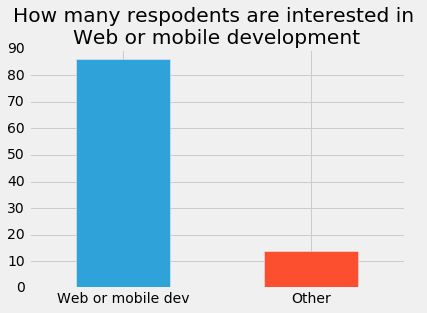

In [5]:
web_mobile = df_not_null.str.contains('Web Developer|Mobile Developer')
web_mobile_perc = web_mobile.value_counts(normalize=True) * 100

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
web_mobile_perc.plot.bar(rot=0)
plt.xticks([0, 1], ['Web or mobile dev', 'Other'])
plt.title('How many respodents are interested in \nWeb or mobile development')
plt.show()

As a result, we noticed that more than 80% all respondents are interested in Web or mobile development. Know that, we can use that group as a sample of population in our analysis becasue we want to focus on that group.

## New Coders - Locations and Densities

In [6]:
location_not_null = df[df['JobRoleInterest'].notnull()]['CountryLive'].copy()
absolut_loacation = location_not_null.value_counts()
relative_location = location_not_null.value_counts(normalize=True) * 100

location_compare = pd.concat([absolut_loacation, relative_location], axis = 1)
location_compare.columns = ['Absolute', 'Relative']
location_compare

,Absolute,Relative
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


As result, we see above that the most respondents live currently in:

* USA - 45.7%
* India - 7.72%
* UK - 4.6%

USA is definitly the best market to choose (almost half of total respondents live there). However, we also need to choose second market. Inida, UK and Canada is has similar number of respondents. We have to investigate, how much each candidate may spend on learing.

## Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

First, we will create a new column which will descrbies the amount of money a student has spent per month (at the moment they completed the survey). Some values in `MonthsProgramming` are 0, so we have to replace them on 1 (we can't divide by 0).

In [7]:
df_ok = df[df['JobRoleInterest'].notnull()].copy()
df_ok['MonthsProgramming'] = df_ok['MonthsProgramming'].replace({0 : 1}) #replace 0 values on 1
df_ok['amount_per_mounth'] = df_ok['MoneyForLearning'] / df_ok['MonthsProgramming']

print('NaN values in column amount_per_mounth:')
df_ok['amount_per_mounth'].isnull().sum()

NaN values in column amount_per_mounth:


675

In [8]:
#Remove also any rows that have null values in the CountryLive column.
df_ok = df_ok[df_ok['CountryLive'].notnull()]

In [9]:
country_mean = df_ok.groupby(['CountryLive']).mean()
countries_4 = country_mean['amount_per_mounth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
countries_4

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: amount_per_mounth, dtype: float64

Above we see that, people in USA may spend the most money on learing average. Then respondents from India and Canada could spend similar amount. After our analysis, we can conclude now that UK market could be the worst compare to other 3 countires.

Our results are very interesting, because it could seems that people in Canada or in UK can spend much more money on learing than people from India, becasue these countries are much richer. However, it is said that India from few years becoming IT center.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

Let's investigate the `amount_per_mounth` column for each country to see if there is some extreme outliers. Extreme outliers could have hugue influence on mean, so we have to eliminate this kind of situation.

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


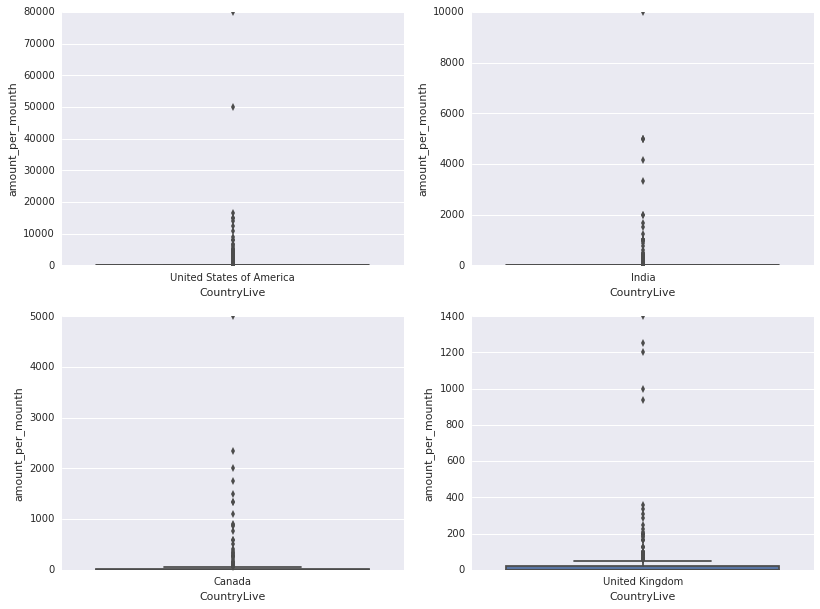

In [10]:
countries = ['United States of America', 'India', 'Canada', 'United Kingdom']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'amount_per_mounth', x = 'CountryLive',
            data = df_ok[df['CountryLive'] == countries[0]])

plt.subplot(2,2,2)
sns.boxplot(y = 'amount_per_mounth', x = 'CountryLive',
            data = df_ok[df['CountryLive'] == countries[1]])

plt.subplot(2,2,3)
sns.boxplot(y = 'amount_per_mounth', x = 'CountryLive',
            data = df_ok[df['CountryLive'] == countries[2]])

plt.subplot(2,2,4)
sns.boxplot(y = 'amount_per_mounth', x = 'CountryLive',
            data = df_ok[df['CountryLive'] == countries[3]])

plt.show()


Looking at chart above, each country has smaller or bigger outliers, however United Kingdom seems to has the most extreme outliers. We can spot many values more than 1000. In the UK. the most values that each studnet may spend on learing is in range 0 - 400.

We can Eliminate the extreme outliers for each countire now.

In [11]:
usa_ok = df_ok[(df_ok['CountryLive'] == countries[0]) & (df_ok['amount_per_mounth'] < 20000)] #remove exterme in USA
india_ok = df_ok[(df_ok['CountryLive'] == countries[1]) & (df_ok['amount_per_mounth'] < 6000)] #remove exterme in India
canada_ok = df_ok[(df_ok['CountryLive'] == countries[2]) & (df_ok['amount_per_mounth'] < 3000)] #remove exterme in Canada
uk_ok = df_ok[(df_ok['CountryLive'] == countries[3]) & (df_ok['amount_per_mounth'] < 400)] #remove exterme in UK

In [12]:
#combine dataframes in one 
df_ok = pd.concat([usa_ok, india_ok])
df_ok = pd.concat([df_ok, canada_ok])
df_ok = pd.concat([df_ok, uk_ok])

In [13]:
#calculate new mean for each country
country_mean = df_ok.groupby(['CountryLive']).mean()
countries_4 = country_mean['amount_per_mounth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
countries_4

CountryLive
United States of America    183.800110
India                       113.748387
United Kingdom               25.245838
Canada                       93.065400
Name: amount_per_mounth, dtype: float64

Our solution to elimate extreme outliers gave as new result. We can spot now that the mean for each country decreases. The biggest difference we may spot in UK, the mean before was 45, now is only 25. At the moment we can eliminate UK in our analysys. Howevere, we have to find only two best countries to choose for advertisement, the first is USA definitely, but we need to compare India and Canada to choose which market will be better.

## Choosing the Two Best Markets


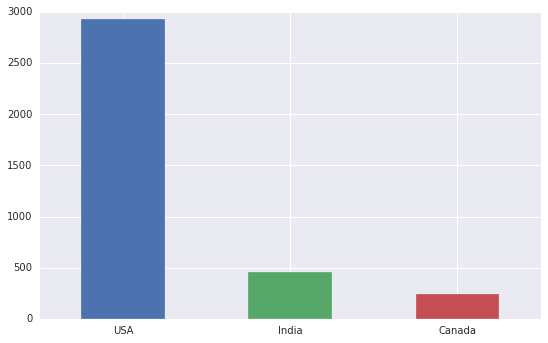

In [14]:
number_respondents = pd.Series([usa_ok.shape[0], india_ok.shape[0], canada_ok.shape[0]], index=['USA', 'India', 'Canada'])
number_respondents.plot.bar(rot=0)

As we mentioned before, USA will be the best market to advertaise. People could spend 183$ dolars per mounth. We need to remeber that our subscription costs 59 per mounth. The average amount of each country is not the best criteria in this case, the better look is number of respondents which can suggest the number of potantial clients. The USA in this case is also the best, beacuse the number of respondents is almost 3000.

The second country to choose, in our opinion is India. People are willing to spend more money than respondents from Canada. Moreover, there are much more respondents than in Canada.

Based on all of the results we've found so far, brainstorm a couple of possible decisions.

* Does it make sense to advertise in more then two countries?

Yes, it make sense, our budget we can split on 3 countries - USA, India and Canada. For example we can create propotion on: 70% - 20% - 10% (propotional to number of respondents).

* Does it make sense to split the advertising budget unequally (e.g.: spend 70% to advertise in the US and 30% to advertise in India)?

Yes, however our proposal is to make propotion 80% - 20%, because it will be propotional to number of respondents, in USA - almost 2700, in India almost 500.

* Does it make sense to advertise only in the US?

It's also seems to be good option, because USA market is totaly domianted and focus only on one country may be good decision.



## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

The second country in our opion should be India, there are much more respondents (potentional clients) and they are willing to spend more money than in USA.

However, if we had a marketing team in our company, may be better to just send them our results and let them use their domain knowledge to take the best decision about choosing second country, becasue we have to remember that it could be more criterias to analysys.